# This notebook is used to collect all the AE project results

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(tidyr)
library(dplyr)
library("ggplot2")
library(ggsci)
library("scales")

library("RColorBrewer")
library('pheatmap')
library("ggpubr")


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 1 Optimal hyperparameter of AE models on simulation dataset (This will include 8 tables for each AE model on all 20 settings)

In [4]:
### extract the optimal hyperparameters for simulation data
model_selection_folder = '/home/wangc90/Data_integration/simulation_model_outputs/model_selection_outputs'

In [5]:
def get_optimal_hypers_simulation(AE_model):
    
    '''
        This is a simple function the extract the optimal hyperparameter set for a given 
        AE models corresponding with lowerest average reconstruction loss
    '''
    hypers_list = []
    for group in [2, 3, 4, 5]:
        for prop_diff in [0.2, 0.4, 0.6, 0.8, 1]:
            optuna_path = f'{model_selection_folder}/{AE_model}/optuna/optuna_{group}_groups_{prop_diff}/optuna.csv'
            optuna_df = pd.read_csv(optuna_path, sep='\t')
            optuna_df.rename(columns={"value": "recon_loss"}, inplace=True)
            optimal_pars = optuna_df.sort_values(by='recon_loss', ascending=True).head(1).T.reset_index()
            optimal_pars.columns = ['index', 'best_trial_value']
            optimal_pars['pars'] =optimal_pars['index'].apply(lambda X: X.replace('params_', ''))
            final_df = optimal_pars[['pars', 'best_trial_value']].set_index('pars')
            final_df.columns = [f'{AE_model}_{group}_groups_{prop_diff}']
            hypers_list.append(final_df)
    final_df_concate = pd.concat(hypers_list, axis=1)
    return final_df_concate

In [6]:
# pd.set_option('display.float_format', '{:.2g}'.format)

cnc_ae_sim = get_optimal_hypers_simulation(AE_model='CNC_AE')
x_ae_sim = get_optimal_hypers_simulation(AE_model='X_AE')
mm_ae_sim = get_optimal_hypers_simulation(AE_model='MM_AE')
ortho_ae_1_sim = get_optimal_hypers_simulation(AE_model='Ortho_AE1')
ortho_ae_2_sim = get_optimal_hypers_simulation(AE_model='Ortho_AE2')
ortho_ae_3_sim = get_optimal_hypers_simulation(AE_model='Ortho_AE3')
nonortho_ae_sim = get_optimal_hypers_simulation(AE_model='NonOrtho_AE')
mocss_ae_sim = get_optimal_hypers_simulation(AE_model='MOCSS_AE')

In [8]:
cnc_ae_sim.head()

,CNC_AE_2_groups_0.2,CNC_AE_2_groups_0.4,CNC_AE_2_groups_0.6,CNC_AE_2_groups_0.8,CNC_AE_2_groups_1,CNC_AE_3_groups_0.2,CNC_AE_3_groups_0.4,CNC_AE_3_groups_0.6,CNC_AE_3_groups_0.8,CNC_AE_3_groups_1,CNC_AE_4_groups_0.2,CNC_AE_4_groups_0.4,CNC_AE_4_groups_0.6,CNC_AE_4_groups_0.8,CNC_AE_4_groups_1,CNC_AE_5_groups_0.2,CNC_AE_5_groups_0.4,CNC_AE_5_groups_0.6,CNC_AE_5_groups_0.8,CNC_AE_5_groups_1
pars,,,,,,,,,,,,,,,,,,,,
recon_loss,0.02362,0.02398,0.022732,0.021734,0.019211,0.026079,0.02532,0.022575,0.020171,0.022309,0.026351,0.02464,0.02162,0.023134,0.020127,0.025692,0.023835,0.027063,0.023631,0.022013
_embed_s1_drop_rate,0.00000,0.60000,0.000000,0.600000,0.200000,0.000000,0.10000,0.000000,0.600000,0.600000,0.600000,0.60000,0.20000,0.000000,0.400000,0.600000,0.100000,0.600000,0.400000,0.400000
_embed_s1_out_dim,256.00000,256.00000,256.000000,32.000000,64.000000,128.000000,256.00000,32.000000,512.000000,64.000000,512.000000,128.00000,128.00000,128.000000,64.000000,128.000000,64.000000,128.000000,32.000000,512.000000
_embed_s2_drop_rate,0.60000,0.00000,0.200000,0.100000,0.200000,0.200000,0.40000,0.400000,0.400000,0.200000,0.100000,0.20000,0.10000,0.200000,0.000000,0.400000,0.600000,0.200000,0.100000,0.000000
_embed_s2_out_dim,512.00000,256.00000,1024.000000,1024.000000,512.000000,64.000000,128.00000,512.000000,32.000000,128.000000,1024.000000,64.00000,512.00000,128.000000,32.000000,64.000000,256.000000,128.000000,32.000000,32.000000


In [9]:
def format_cell(val):
    if val >= 1:
        return '{:.0f}'.format(val)
    if val == 0:
        return '0'
    if val == 0.1:
        return '0.1'
    if val==0.01:
        return '0.01'
    if val == 0.2:
        return '0.2'
    if val == 0.4:
        return '0.4'
    if val == 0.6:
        return '0.6'
    if np.isnan(val):
        return 'NA'
    if val < 0.0001:
        return '{:.7f}'.format(val)
    else:
        return '{:.4f}'.format(val)

In [10]:
### Save the optimal hyperparameters into excel files
# names = ['cnc_ae', 'x_ae', 'mm_ae', 'mocss_ae',
#          'ortho_ae_1', 'ortho_ae_2', 'ortho_ae_3', 'nonortho_ae']

# for index, hyper_df in enumerate([cnc_ae_sim, x_ae_sim, mm_ae_sim, mocss_ae_sim,
#                  ortho_ae_1_sim, ortho_ae_2_sim, ortho_ae_3_sim, nonortho_ae_sim]):
#     hyper_df_ = hyper_df.applymap(lambda X: format_cell(X))
#     print(names[index])
#     hyper_df_.to_csv(f'/home/wangc90/Data_integration/AE_results_folder/{names[index]}_optimal_hypers_simulation.csv',
#                     sep=',')

# print(optimal_hypers_latex)

### 2 Corresponding lowest 5-fold CV recon loss for simulation dataset

In [11]:
def get_recon_loss_cv_simulation(AE_model):
    
    '''
        This is a simple function the extract the cv loss for each AE model in each dataset
    '''
    model_selection_folder = '/home/wangc90/Data_integration/simulation_model_outputs/model_selection_outputs'
    cv_recon_loss_list = []
    for group in [2, 3, 4, 5]:
        for prop_diff in [0.2, 0.4, 0.6, 0.8, 1]:
            val_loss_path = f'{model_selection_folder}/{AE_model}/val_loss/val_{group}_groups_{prop_diff}_loss/val_loss.csv'
            val_loss_df = pd.read_csv(val_loss_path, sep='\t', header=None)
            val_loss_df.columns = ['trial', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']
            
            ### get the row mean and select the smallest one
            val_loss_df['avg'] = val_loss_df.mean(axis=1, numeric_only=True)
            final_df = pd.DataFrame(val_loss_df.iloc[val_loss_df['avg'].idxmin(axis=0),]).T.drop(columns=['avg'])
            
            final_df_ = final_df.melt(id_vars='trial')
            final_df_['model_type'] = AE_model
            final_df_['data_type'] = f'{group}_groups_{prop_diff}'
            final_df_.columns = ['trial_num', 'cv_num', 'cv_recon_loss', 'model_type', 'data_type']
            
            final_df_['cv_recon_loss'] = pd.to_numeric(final_df_['cv_recon_loss'])
            
            cv_recon_loss_list.append(final_df_)
    final_df_concate = pd.concat(cv_recon_loss_list, axis=0)
    
    return final_df_concate

In [12]:
model_list = ['CNC_AE', 'X_AE', 'MM_AE', 
              'NonOrtho_AE', 'Ortho_AE1', 'Ortho_AE2', 'Ortho_AE3']

all_recon_loss_cv_list = []

for model in model_list:
    
    recon_loss_cv_df = get_recon_loss_cv_simulation(AE_model=model)
    all_recon_loss_cv_list.append(recon_loss_cv_df)

all_recon_loss_cv_df = pd.concat(all_recon_loss_cv_list, axis=0)

In [14]:
all_recon_loss_cv_df_ = all_recon_loss_cv_df.reset_index().drop(columns='index')

In [15]:
all_recon_loss_cv_df_.head()

,trial_num,cv_num,cv_recon_loss,model_type,data_type
0,trial42,cv1,0.023529,CNC_AE,2_groups_0.2
1,trial42,cv2,0.023533,CNC_AE,2_groups_0.2
2,trial42,cv3,0.023426,CNC_AE,2_groups_0.2
3,trial42,cv4,0.023602,CNC_AE,2_groups_0.2
4,trial42,cv5,0.024012,CNC_AE,2_groups_0.2


In [16]:
### update the AE model names: 
# NonOrtho_AE  ->  JISAE
# Ortho_AE1  ->  JISAE-O1
# Ortho_AE2  ->  JISAE-O2
# Ortho_AE3  ->  JISAE-O3

model_name_dict = {'NonOrtho_AE': 'JISAE', 'Ortho_AE1': 'JISAE-O1', 'Ortho_AE2': 'JISAE-O2', 'Ortho_AE3': 'JISAE-O3'}
all_recon_loss_cv_df_['model_type_updated'] = all_recon_loss_cv_df_['model_type'].apply(lambda X: model_name_dict[X] if X in model_name_dict else X)

In [17]:
all_recon_loss_cv_df_['model_type_updated'].unique()

array(['CNC_AE', 'X_AE', 'MM_AE', 'JISAE', 'JISAE-O1', 'JISAE-O2',
       'JISAE-O3'], dtype=object)

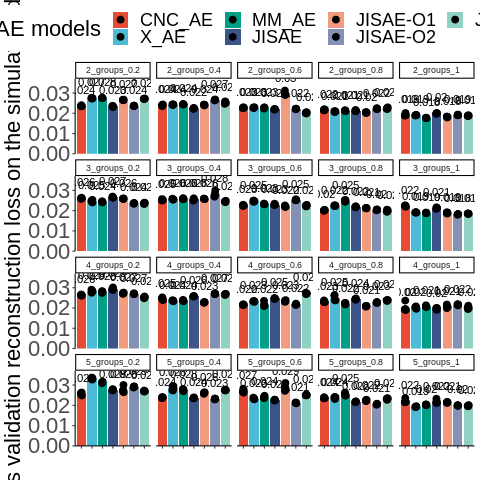

In [18]:
%%R -i all_recon_loss_cv_df_


all_recon_loss_cv_df_$model_type_updated <- factor(all_recon_loss_cv_df_$model_type_updated,
                                                   levels=c("CNC_AE", "X_AE", "MM_AE","JISAE", "JISAE-O1", "JISAE-O2", "JISAE-O3"),
                                                   labels=c("CNC_AE", "X_AE", "MM_AE","JISAE", "JISAE-O1", "JISAE-O2", "JISAE-O3"))

p <- ggplot(all_recon_loss_cv_df_, aes(x = model_type_updated, y = cv_recon_loss, fill = model_type_updated)) +
     stat_summary(fun = "mean", geom = "bar") +
    geom_text(aes(label = after_stat(round(y, 3))), stat = "summary", fun = "mean", vjust = -1.5 , size=4) +
    geom_point(aes(x = model_type_updated), position = position_jitterdodge(jitter.width = 0.5, jitter.height=0, 
                                dodge.width=1), size=3, color='black') +
    facet_wrap(vars(data_type), nrow=4) +
    scale_y_continuous(breaks = seq(0, 0.3, 0.01), expand = expansion(mult = c(0, 0.1))) +
    ylab('5-fold cross validation reconstruction loss on the simulation dataset') + xlab('') + scale_fill_npg(name='AE models') + 
 theme_classic() +
    theme(legend.position = "top",
        legend.title = element_text(size = 22),
        legend.text = element_text(size = 18),
        axis.text.x = element_text(angle = 0, size = 0),
        axis.text.y = element_text(size = 22),
        axis.title = element_text(size = 22)) 
     
ggsave(filename=file.path('/home/wangc90/Data_integration/AE_results_folder/5_fold_cv_recon_loss_simulation.pdf'),
       width=15, height=15, plot=p)

p

### 3. Recon loss and classification accuracy for retrained AE models on simulation dataset

In [63]:
with open('/home/wangc90/Data_integration/simulation_model_outputs/model_comparison_results/recon_loss_train_result') as f:
    recon_loss_train_result = json.load(f)
    
with open('/home/wangc90/Data_integration/simulation_model_outputs/model_comparison_results/recon_loss_test_result') as f:
    recon_loss_test_result = json.load(f)
    
with open('/home/wangc90/Data_integration/simulation_model_outputs/model_comparison_results/nb_training_acc') as f:
    nb_training_acc = json.load(f)
    

with open('/home/wangc90/Data_integration/simulation_model_outputs/model_comparison_results/nb_testing_acc') as f:
    nb_testing_acc = json.load(f)

In [75]:
np.mean(recon_loss_train_result['X_AE_2_groups_0.2_diff_training_recon_loss'])

1.0816193794210751

In [80]:
setting

'2_groups_0.2_diff'

In [ ]:
### Start from here

In [84]:
for k, v in recon_loss_train_result.items():
    print(k, np.mean(v), np.std(v))
#     break

CNC_AE_2_groups_0.2_diff_training_recon_loss 0.9468519292771816 0.07403469991067345
X_AE_2_groups_0.2_diff_training_recon_loss 1.0816193794210751 0.019398103860993367
MM_AE_2_groups_0.2_diff_training_recon_loss 1.0789788817365964 0.02077437771388407
MOCSS_AE_2_groups_0.2_diff_training_recon_loss 1.5424172086020311 0.0419137862219137
NonOrtho_AE_2_groups_0.2_diff_training_recon_loss 0.9294222010920445 0.029001731504122837
Ortho_AE1_2_groups_0.2_diff_training_recon_loss 1.0734125405550003 0.11747022156206176
Ortho_AE2_2_groups_0.2_diff_training_recon_loss 0.9325154966364304 0.027082594598714378
Ortho_AE3_2_groups_0.2_diff_training_recon_loss 1.0901942695180575 0.11063903819464822
CNC_AE_2_groups_0.4_diff_training_recon_loss 0.9788978300988674 0.13595110367831037
X_AE_2_groups_0.4_diff_training_recon_loss 0.9484384691963593 0.030375611967364248
MM_AE_2_groups_0.4_diff_training_recon_loss 0.9573482329646746 0.02977693762089926
MOCSS_AE_2_groups_0.4_diff_training_recon_loss 1.50751307830214

#### Collect reconstruction loss result on the simulation dataset

In [181]:
def result_extract(results_dict, setting):
    df_mean = pd.DataFrame.from_dict({k:np.mean(v) for k, v in results_dict.items() if setting in k}, orient='index')
    df_mean.columns = [setting + '_mean']
    df_mean.index = ['_'.join(i.split('_')[:2]) for i in df_mean.index]
    
    df_std = pd.DataFrame.from_dict({k:np.std(v) for k, v in results_dict.items() if setting in k}, orient='index')
    df_std.columns = [setting + '_std']
    df_std.index = ['_'.join(i.split('_')[:2]) for i in df_mean.index]
    
    df = pd.concat([df_mean, df_std], axis=1)
    df[setting + '_label'] = [str(round(x, 3)) + ' \n(' + str(round(y,3)) + ') ' for x, y in zip(df[setting + '_mean'], df[setting + '_std'])]
    
    ### using df_mean for heatmap value and df[['lables']] for annotation purpose
    
    return df_mean, df[[setting + '_label']]

In [182]:
setting

'5_groups_1_diff'

In [229]:
result_extract(recon_loss_test_result, '5_groups_1_diff')[1]

,5_groups_1_diff_label
CNC_AE,0.944 \n(0.066)
X_AE,0.878 \n(0.055)
MM_AE,0.907 \n(0.06)
MOCSS_AE,1.656 \n(0.109)
NonOrtho_AE,0.943 \n(0.069)
Ortho_AE1,0.943 \n(0.068)
Ortho_AE2,0.919 \n(0.02)
Ortho_AE3,0.891 \n(0.063)


In [184]:
result_extract(recon_loss_train_result, '5_groups_1_diff')[1]

,5_groups_1_diff_label
CNC_AE,0.843 \n(0.078)
X_AE,0.753 \n(0.046)
MM_AE,0.79 \n(0.054)
MOCSS_AE,1.328 \n(0.088)
NonOrtho_AE,0.837 \n(0.062)
Ortho_AE1,0.839 \n(0.059)
Ortho_AE2,0.779 \n(0.039)
Ortho_AE3,0.769 \n(0.054)


In [223]:
def simulation_recon_result_combining(is_training):
    
    '''
        combine the extracted recon loss for training and testing on the simulation set
    '''
    if is_training:
        results_dict=recon_loss_train_result.copy()
    else:
        results_dict=recon_loss_test_result.copy()
    
    recon_loss_result_list = []
    recon_loss_result_label_list = []

    for group in [2, 3, 4, 5]:
        for prop_diff in [0.2, 0.4, 0.6, 0.8, 1]:
            setting = f'{group}_groups_{prop_diff}_diff'
            df_mean, df_label = result_extract(results_dict=results_dict, setting=setting)
            recon_loss_result_list.append(df_mean)
            recon_loss_result_label_list.append(df_label)

    ## get rid of MOCSS for recon loss comparison
    recon_loss_result_df = pd.concat(recon_loss_result_list, axis=1).reset_index()
    recon_loss_result_df_ = recon_loss_result_df[recon_loss_result_df['index'] != 'MOCSS_AE'].copy()
    
    recon_loss_result_label_df = pd.concat(recon_loss_result_label_list, axis=1).reset_index()
    recon_loss_result_label_df_ = recon_loss_result_label_df[recon_loss_result_label_df['index'] != 'MOCSS_AE'].copy()
    
    ## update the AE names
    recon_loss_result_df_['index_update'] = recon_loss_result_df_['index'].apply(lambda X: model_name_dict[X] if X in model_name_dict else X)
    recon_loss_result_label_df_['index_update'] = recon_loss_result_label_df_['index'].apply(lambda X: model_name_dict[X] if X in model_name_dict else X)    
    
    
    recon_loss_result_df_final = recon_loss_result_df_.drop(columns=['index']).set_index('index_update')
    recon_loss_result_label_df_final = recon_loss_result_label_df_.drop(columns=['index']).set_index('index_update')
    
    ## update the column names for recon_loss_result_df_final
    recon_loss_result_df_final.columns = [col.strip('_mean') for col in recon_loss_result_df_final.columns]
    return recon_loss_result_df_final, recon_loss_result_label_df_final

In [224]:
recon_train_df, recon_train_label_df = simulation_recon_result_combining(is_training=True)

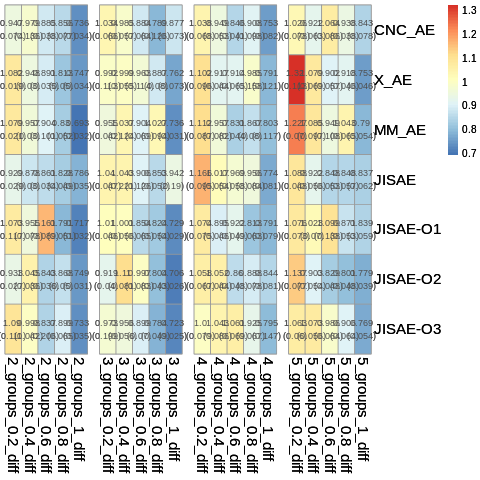

In [446]:
%%R -i recon_train_df -i recon_train_label_df

heatmap_mat <- as.matrix(recon_train_df)


Fig <- pheatmap(mat = heatmap_mat, 
                scale = 'none',cluster_rows= FALSE,
                cluster_cols = FALSE, display_numbers=recon_train_label_df,
                gaps_col = c(5,5,5, 10,10,10, 15, 15, 15),
                fontsize_number=9,fontsize_col=15, fontsize_row=15)

figure_path <- '/home/wangc90/Data_integration/AE_results_folder/avg_recon_loss_training_simulation.svg'

ggsave(file=figure_path,plot=Fig[[4]], width=10, height=10)
Fig


In [226]:
recon_test_df, recon_test_label_df = simulation_recon_result_combining(is_training=False)

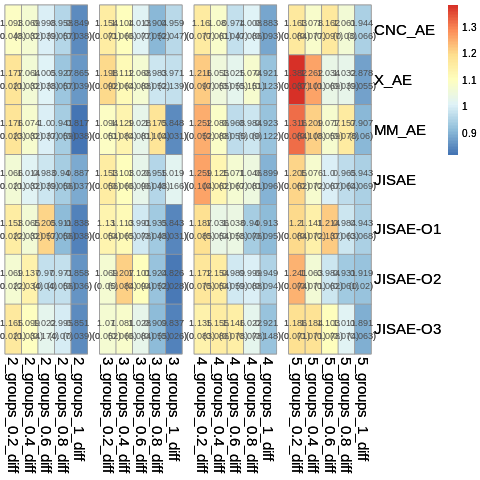

In [447]:
%%R -i recon_test_df -i recon_test_label_df

heatmap_mat <- as.matrix(recon_test_df)


Fig <- pheatmap(mat = heatmap_mat, 
                scale = 'none',cluster_rows= FALSE,
                cluster_cols = FALSE, display_numbers=recon_test_label_df,
                gaps_col = c(5,5,5, 10,10,10, 15, 15, 15),
                fontsize_number=9, fontsize_col=15, fontsize_row=15)

figure_path <- '/home/wangc90/Data_integration/AE_results_folder/avg_recon_loss_testing_simulation.svg'

ggsave(file=figure_path,plot=Fig[[4]], width=10, height=10)
Fig


#### collect the classification results on the simulation dataset

In [291]:
def result_extract2(results_dict, setting):
    df_mean = pd.DataFrame.from_dict({k:np.mean(list(v.values())) for k, v in results_dict.items() if setting in k}, orient='index')
    df_mean.columns = [setting + '_mean']
    df_mean.index = ['_'.join(i.split('_')[:2]) for i in df_mean.index]
    
    df_std = pd.DataFrame.from_dict({k:np.std(list(v.values())) for k, v in results_dict.items() if setting in k}, orient='index')
    df_std.columns = [setting + '_std']
    df_std.index = ['_'.join(i.split('_')[:2]) for i in df_std.index]
    
    df = pd.concat([df_mean, df_std], axis=1)
    df[setting + '_label'] = [str(round(x, 3)) + ' \n(' + str(round(y,3)) + ') ' for x, y in zip(df[setting + '_mean'], df[setting + '_std'])]
    
    ### using df_mean for heatmap value and df[['lables']] for annotation purpose
    return df_mean, df[[setting + '_label']]

In [292]:
df1, df2 = result_extract2(nb_training_acc, '2_groups_0.2_diff')

In [293]:
df1, df2

(             2_groups_0.2_diff_mean
 CNC_AE                          1.0
 X_AE                            1.0
 MM_AE                           1.0
 MOCSS_AE                        1.0
 NonOrtho_AE                     1.0
 Ortho_AE1                       1.0
 Ortho_AE2                       1.0
 Ortho_AE3                       1.0,
             2_groups_0.2_diff_label
 CNC_AE                 1.0 \n(0.0) 
 X_AE                   1.0 \n(0.0) 
 MM_AE                  1.0 \n(0.0) 
 MOCSS_AE               1.0 \n(0.0) 
 NonOrtho_AE            1.0 \n(0.0) 
 Ortho_AE1              1.0 \n(0.0) 
 Ortho_AE2              1.0 \n(0.0) 
 Ortho_AE3              1.0 \n(0.0) )

In [298]:
def simulation_acc_result_combining(is_training):
    
    '''
        combine the extracted recon loss for training and testing on the simulation set
    '''
    if is_training:
        results_dict=nb_training_acc.copy()
    else:
        results_dict=nb_testing_acc.copy()
    
    nb_acc_list = []
    nb_acc_label_list = []

    for group in [2, 3, 4, 5]:
        for prop_diff in [0.2, 0.4, 0.6, 0.8, 1]:
            setting = f'{group}_groups_{prop_diff}_diff'
            df_mean, df_label = result_extract2(results_dict=results_dict, setting=setting)
            nb_acc_list.append(df_mean)
            nb_acc_label_list.append(df_label)

    nb_acc_df = pd.concat(nb_acc_list, axis=1).reset_index()
    nb_acc_label_df = pd.concat(nb_acc_label_list, axis=1).reset_index()
    ## update the AE names
    nb_acc_df['index_update'] = nb_acc_df['index'].apply(lambda X: model_name_dict[X] if X in model_name_dict else X)
    nb_acc_label_df['index_update'] = nb_acc_label_df['index'].apply(lambda X: model_name_dict[X] if X in model_name_dict else X)    
    
    nb_acc_df_final = nb_acc_df.drop(columns=['index']).set_index('index_update')
    nb_acc_label_df_final = nb_acc_label_df.drop(columns=['index']).set_index('index_update')
    
    ## update the column names for recon_loss_result_df_final
    nb_acc_df_final.columns = [col.strip('_mean') for col in nb_acc_df_final.columns]
    return nb_acc_df_final, nb_acc_label_df_final

In [299]:
nb_training_acc_df, nb_training_acc_label_df = simulation_acc_result_combining(is_training=True)

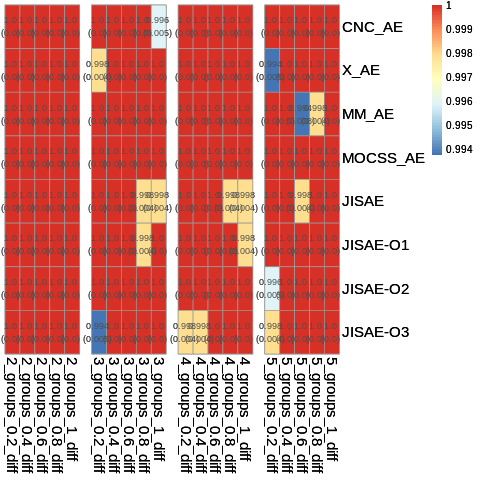

In [448]:
%%R -i nb_training_acc_df -i nb_training_acc_label_df

heatmap_mat <- as.matrix(nb_training_acc_df)


Fig <- pheatmap(mat = heatmap_mat, 
                scale = 'none',cluster_rows= FALSE,
                cluster_cols = FALSE, display_numbers=nb_training_acc_label_df,
                gaps_col = c(5,5,5, 10,10,10, 15, 15, 15),
                fontsize_number=9, fontsize_col=15, fontsize_row=15)

figure_path <- '/home/wangc90/Data_integration/AE_results_folder/avg_nb_acc_training_simulation.svg'

ggsave(file=figure_path,plot=Fig[[4]], width=10, height=10)
Fig


In [301]:
nb_testing_acc_df, nb_testing_acc_label_df = simulation_acc_result_combining(is_training=False)

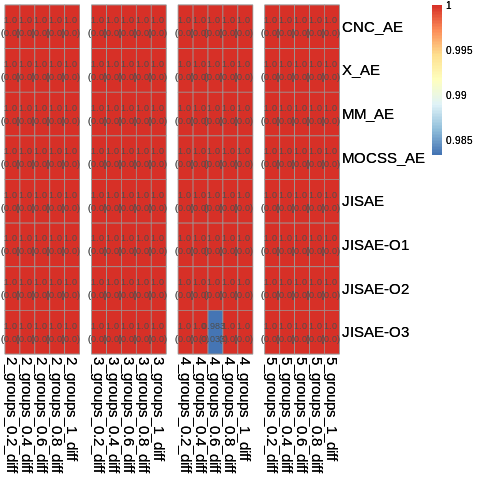

In [449]:
%%R -i nb_testing_acc_df -i nb_testing_acc_label_df

heatmap_mat <- as.matrix(nb_testing_acc_df)


Fig <- pheatmap(mat = heatmap_mat, 
                scale = 'none',cluster_rows= FALSE,
                cluster_cols = FALSE, display_numbers=nb_testing_acc_label_df,
                gaps_col = c(5,5,5, 10,10,10, 15, 15, 15),
                fontsize_number=9, fontsize_col=15, fontsize_row=15)

figure_path <- '/home/wangc90/Data_integration/AE_results_folder/avg_nb_acc_testing_simulation.svg'

ggsave(file=figure_path,plot=Fig[[4]], width=10, height=10)
Fig

## TCGA results start from here

### 4 Optimal hyperparameters of AE models for the TCGA dataset

In [304]:
model_selection_folder = '/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/'

In [305]:
def get_optimal_hypers(AE_model):
    
    '''
        This is a simple function the extract the optimal hyperparameter set for a given 
        AE models corresponding with lowerest average reconstruction loss
    '''
    optuna_path = model_selection_folder + AE_model + '/optuna/optuna.csv'
    
    optuna_df = pd.read_csv(optuna_path, sep='\t')
    optuna_df.rename(columns={"value": "recon_loss"}, inplace=True)
    optimal_pars = optuna_df.sort_values(by='recon_loss', ascending=True).head(1).T.reset_index()
    optimal_pars.columns = ['index', 'best_trial_value']
    optimal_pars['pars'] =optimal_pars['index'].apply(lambda X: X.replace('params_', ''))
    final_df = optimal_pars[['pars', 'best_trial_value']].set_index('pars')
    return final_df

In [306]:
cnc_ae = get_optimal_hypers(AE_model='CNC_AE')
x_ae = get_optimal_hypers(AE_model='X_AE')
mm_ae = get_optimal_hypers(AE_model='MM_AE')
ortho_ae_1 = get_optimal_hypers(AE_model='Ortho_AE_1')
ortho_ae_2 = get_optimal_hypers(AE_model='Ortho_AE_2')
ortho_ae_3 = get_optimal_hypers(AE_model='Ortho_AE_3')
nonortho_ae = get_optimal_hypers(AE_model='NonOrtho_AE')
mocss_ae = get_optimal_hypers(AE_model='MOCSS_AE')

In [307]:
len(cnc_ae.index.union(x_ae.index).union(mm_ae.index).union(ortho_ae_1.index).union(ortho_ae_2.index).union(ortho_ae_3.index).union(nonortho_ae.index).union(mocss_ae.index))

54

In [308]:
optimal_hypers_dict = {'CNC_AE': cnc_ae, 'X_AE': x_ae, 'MM_AE':mm_ae, 'Ortho_AE_1':ortho_ae_1,
                       'Ortho_AE_2': ortho_ae_2, 'Ortho_AE_3': ortho_ae_3, 'NonOrtho_AE': nonortho_ae,
                       'MOCSS': mocss_ae}

optimal_hypers_df = pd.concat(optimal_hypers_dict, axis=1)

optimal_hypers_df.columns = ['_'.join(col) for col in optimal_hypers_df.columns.values]

optimal_hypers_df.columns = [col.replace('_best_trial_value', '') for col in optimal_hypers_df.columns]

In [309]:
optimal_hypers_df = optimal_hypers_df.applymap(lambda X: format_cell(X))
optimal_hypers_df.to_csv('/home/wangc90/Data_integration/AE_results_folder/optimal_hypers_tcga.csv',
                    sep=',')

In [310]:
# optimal_hypers_df_format = optimal_hypers_df.applymap(lambda X: format_cell(X))

# optimal_hypers_latex = optimal_hypers_df_format.reset_index().to_latex(index=False)

# print(optimal_hypers_latex)

### 5 Corresponding lowest 5-fold CV recon loss for TCGA dataset

In [311]:
%%R
### R function to get the best average cv in each setting
cv_sum = function(data, model_type){  
  
  data1 <- data %>%
  rename(trial_num=V1, cv1=V2, cv2=V3, cv3=V4, cv4=V5, cv5=V6)
    
  row_means = rowMeans(data1[, c('cv1', 'cv2', 'cv3', 'cv4', 'cv5')])
  best_cv = data1[which.min(row_means), ]
  best_cv['model_type'] = model_type
    return(best_cv)
} 

In [312]:
%%R -o cv_val_loss_
CNC_AE_val_loss = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/CNC_AE/val_loss/val_loss.csv', header=F, sep='\t')
X_AE_val_loss = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/X_AE/val_loss/val_loss.csv', header=F, sep='\t')
MM_AE_val_loss = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/MM_AE/val_loss/val_loss.csv', header=F, sep='\t')
NonOrtho_AE_val_loss = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/NonOrtho_AE/val_loss/val_loss.csv', header=F, sep='\t')
Ortho_AE_val_loss = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/Ortho_AE_1/val_loss/val_loss.csv', header=F, sep='\t')
Ortho_AE_2_val_loss = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/Ortho_AE_2/val_loss/val_loss.csv', header=F, sep='\t')
Ortho_AE_3_val_loss = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/Ortho_AE_3/val_loss/val_loss.csv', header=F, sep='\t')
MOCSS_val_loss = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/MOCSS_AE/val_loss/val_loss.csv', header=F, sep='\t')


cv_val_loss = as.data.frame(bind_rows(cv_sum(data = CNC_AE_val_loss, model_type = 'CNC_AE'),
          cv_sum(data = X_AE_val_loss, model_type = 'X_AE'),
          cv_sum(data = MM_AE_val_loss, model_type = 'MM_AE'),
          cv_sum(data = NonOrtho_AE_val_loss, model_type = 'JISAE'),
          cv_sum(data = Ortho_AE_val_loss, model_type = 'JISAE-O1'),
          cv_sum(data = Ortho_AE_2_val_loss, model_type = 'JISAE-O2'),
          cv_sum(data = Ortho_AE_3_val_loss, model_type = 'JISAE-O3'),
#           cv_sum(data = MOCSS_val_loss, model_type = 'MOCSS'),
         ))


cv_val_loss$model_type = factor(cv_val_loss$model_type, levels = c(c('CNC_AE', 'X_AE', 'MM_AE', 'JISAE','JISAE-O1',
                                                                    'JISAE-O2', 'JISAE-O3',
                                                                    'MOCSS')))

cv_val_loss_ = cv_val_loss %>%
pivot_longer(cols = c(cv1, cv2, cv3, cv4, cv5),
               names_to = "cv_num",
               values_to = "cv_recon_loss")

In [313]:
cv_val_loss_['model_type'].unique()

['CNC_AE', 'X_AE', 'MM_AE', 'JISAE', 'JISAE-O1', 'JISAE-O2', 'JISAE-O3']
Categories (8, object): ['CNC_AE', 'X_AE', 'MM_AE', 'JISAE', 'JISAE-O1', 'JISAE-O2', 'JISAE-O3', 'MOCSS']

In [314]:
cv_val_loss_

,trial_num,model_type,cv_num,cv_recon_loss
1,trial92,CNC_AE,cv1,0.081182
2,trial92,CNC_AE,cv2,0.081267
3,trial92,CNC_AE,cv3,0.081082
4,trial92,CNC_AE,cv4,0.080883
5,trial92,CNC_AE,cv5,0.081141
6,trial92,X_AE,cv1,0.080593
7,trial92,X_AE,cv2,0.080605
8,trial92,X_AE,cv3,0.078907
9,trial92,X_AE,cv4,0.080469
10,trial92,X_AE,cv5,0.080451


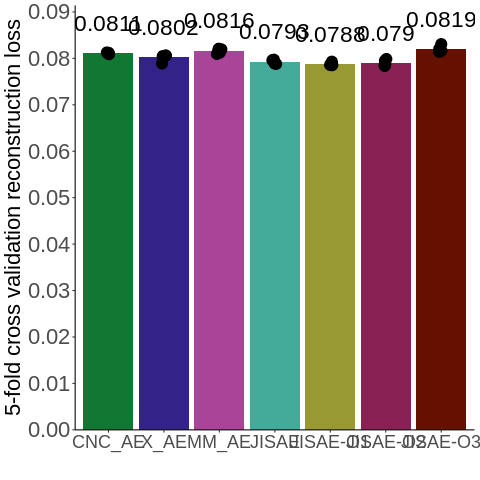

In [315]:
%%R -i cv_val_loss_

p1 <- ggplot(cv_val_loss_, aes(x = model_type, y = cv_recon_loss, fill = model_type)) +
    geom_bar(position = 'dodge', stat = 'summary', fun=mean) +
    geom_text(aes(label = after_stat(round(y, 4))), stat = "summary", fun = "mean", vjust = -1.5 , size=8) +
    geom_point(aes(x = model_type), position = 
           position_jitterdodge(jitter.width = 0.5, jitter.height=0, 
                                dodge.width=1), size=5, color='black') +
    scale_y_continuous(breaks = seq(0, 0.2, 0.01), expand = expansion(mult = c(0, 0.1))) +
      labs(x='',
           y='5-fold cross validation reconstruction loss',
           fill='Model types') +
      scale_fill_manual('Model types', values = c("#117733", "#332288", "#AA4499", 
                                 "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888")) +
      theme_classic() +
      theme(legend.position = "None",
            legend.title = element_text(size = 22),
            legend.text = element_text(size = 18),
            axis.text.x = element_text(angle = 0, size = 18),
            axis.text.y = element_text(size = 22),
            axis.title = element_text(size = 22))

ggsave(filename=file.path('/home/wangc90/Data_integration/AE_results_folder/5_fold_cv_recon_loss_tcga.pdf'),
       width=15, height=15, plot=p1)
p1

### 6 Recon loss and classification accuracy for retrained AE models on cancer dataset (recon loss is in table)

### Get the reconstruction loss for tcga dataset

In [316]:
import torch
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler, random_split
import torch.optim as optim
import pandas as pd
import numpy as np
import os
import random
from collections import defaultdict, Counter
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import KFold
import optuna
from torchmetrics.classification import F1Score
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")
import random
from sklearn.model_selection import ShuffleSplit
from sklearn.cluster import KMeans,DBSCAN,Birch
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, v_measure_score

sys.path.insert(1, '/home/wangc90/Data_integration/MOCSS/mocss/code/')
from critic import LinearCritic
# from Supcon import SupConLoss
from contrastive_loss import InstanceLoss, ClusterLoss
import evaluation
from sklearn import metrics
from Data_prep import DataSet_Prep, DataSet_construction
from tsn_visulization import tsn_data, tsn_plot
from reconloss_from_retrained_models import recon_loss
random.seed(2023)
from embedding_from_retrained_models import embedding_collection
torch.manual_seed(2023)
from nb_classification import nb_classfication


In [317]:
combined_exp_df = pd.read_csv('/home/wangc90/Data_integration/TCGA_data/TCGA_primary_tumor_data/combined_exp_df.csv', sep='\t')
combined_miRNA_df = pd.read_csv('/home/wangc90/Data_integration/TCGA_data/TCGA_primary_tumor_data/combined_miRNA_df.csv', sep='\t')

labels = pd.read_csv('/home/wangc90/Data_integration/TCGA_data/TCGA_primary_tumor_data/labels.csv', sep='\t')['0']

dataset_prep = DataSet_Prep(data1=combined_exp_df, data2=combined_miRNA_df, label=labels, training_prop=0.8)

train_key, test_key = dataset_prep.get_train_test_keys()

feature1_tensors, feature2_tensors, label_tensors = dataset_prep.to_tensor(train_key)

feature1_tensors_test, feature2_tensors_test, label_tensors_test = dataset_prep.to_tensor(test_key)


train_dataset = DataSet_construction(feature1_tensors, feature2_tensors, label_tensors)
test_dataset = DataSet_construction(feature1_tensors_test, feature2_tensors_test, label_tensors_test)


recon_loss_train_result = dict()
recon_loss_test_result = dict()

feature1 and feature2 are being scaled with MinMaxScaler
feature1 and feature2 are being scaled with MinMaxScaler


In [318]:
len(train_dataset), len(test_dataset)

(1494, 372)

In [325]:
from model_structures import CNC_AE, CNC_Decoder, CNC_Encoder

CNC_model_path = "/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/CNC_AE_retraining/retrained_model_149.pt"
CNC_model = torch.load(CNC_model_path)


### applied the retrain model to entire training set to get the embeddings
CNC_recon_loss = recon_loss(model_path=CNC_model_path, data_set=train_dataset, is_SS=False, is_MOCSS=False)

CNC_recon_loss_mean = np.mean(CNC_recon_loss)
CNC_recon_loss_std = np.std(CNC_recon_loss)

CNC_recon_test_loss = recon_loss(model_path=CNC_model_path, data_set=test_dataset, is_SS=False, is_MOCSS=False)

CNC_recon_test_loss_mean = np.mean(CNC_recon_test_loss)
CNC_recon_test_loss_std = np.std(CNC_recon_test_loss)

recon_loss_train_result['CNC_AE_mean'] = round(CNC_recon_loss_mean, 4)
recon_loss_train_result['CNC_AE_std'] = round(CNC_recon_loss_std, 4)

recon_loss_test_result['CNC_AE_mean'] = round(CNC_recon_test_loss_mean, 4)
recon_loss_test_result['CNC_AE_std'] = round(CNC_recon_test_loss_std, 4)



1494
372


In [328]:
from model_structures import X_AE, X_AE_Encoder, X_AE_Decoder

X_model_path = "/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/X_AE_retraining/retrained_model_119.pt"
X_model = torch.load(X_model_path)

### applied the retrain model to entire training set to get the embeddings
X_recon_loss = recon_loss(model_path=X_model_path, data_set=train_dataset, is_SS=False, is_MOCSS=False)

X_recon_loss_mean = np.mean(X_recon_loss)
X_recon_loss_std = np.std(X_recon_loss)

### testing loss
X_recon_test_loss = recon_loss(model_path=X_model_path, data_set=test_dataset, is_SS=False, is_MOCSS=False)

X_recon_test_loss_mean = np.mean(X_recon_test_loss)
X_recon_test_loss_std = np.std(X_recon_test_loss)

recon_loss_train_result['X_AE_mean'] = round(X_recon_loss_mean, 4)
recon_loss_train_result['X_AE_std'] = round(X_recon_loss_std, 4)

recon_loss_test_result['X_AE_mean'] = round(X_recon_test_loss_mean, 4)
recon_loss_test_result['X_AE_std'] = round(X_recon_test_loss_std, 4)



1494
372


In [329]:
from model_structures import MM_AE, MM_AE_Encoder, MM_AE_Decoder

MM_model_path = "/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/MM_AE_retraining/retrained_model_149.pt"
MM_model = torch.load(MM_model_path)


### applied the retrain model to entire training set to get the embeddings
MM_recon_loss = recon_loss(model_path=MM_model_path, data_set=train_dataset, is_SS=False, is_MOCSS=False)

MM_recon_loss_mean = np.mean(MM_recon_loss)
MM_recon_loss_std = np.std(MM_recon_loss)

### testing loss
MM_recon_test_loss = recon_loss(model_path=MM_model_path, data_set=test_dataset, is_SS=False, is_MOCSS=False)
MM_recon_test_loss_mean = np.mean(MM_recon_test_loss)
MM_recon_test_loss_std = np.std(MM_recon_test_loss)


recon_loss_train_result['MM_AE_mean'] = round(MM_recon_loss_mean, 4)
recon_loss_train_result['MM_AE_std'] = round(MM_recon_loss_std, 4)

recon_loss_test_result['MM_AE_mean'] = round(MM_recon_test_loss_mean, 4)
recon_loss_test_result['MM_AE_std'] = round(MM_recon_test_loss_std, 4)


1494
372


In [330]:
from model_structures import SS_AE, SS_Decoder, SS_Encoder

NonOrtho_model_path = "/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/NonOrtho_retraining/retrained_model_149.pt"
NonOrtho_model = torch.load(NonOrtho_model_path)

### applied the retrain model to entire training set to get the embeddings
SS_recon_loss = recon_loss(model_path=NonOrtho_model_path, data_set=train_dataset, is_SS=True, is_MOCSS=False)

SS_recon_loss_mean = np.mean(SS_recon_loss)
SS_recon_loss_std = np.std(SS_recon_loss)

### testing loss

SS_recon_test_loss = recon_loss(model_path=NonOrtho_model_path, data_set=test_dataset, is_SS=True, is_MOCSS=False)
SS_recon_test_loss_mean = np.mean(SS_recon_test_loss)
SS_recon_test_loss_std = np.std(SS_recon_test_loss)

recon_loss_train_result['NonOrtho_AE_mean'] = round(SS_recon_loss_mean, 4)
recon_loss_train_result['NonOrtho_AE_std'] = round(SS_recon_loss_std, 4)

recon_loss_test_result['NonOrtho_AE_mean'] = round(SS_recon_test_loss_mean, 4)
recon_loss_test_result['NonOrtho_AE_std'] = round(SS_recon_test_loss_std, 4)


1494
372


In [331]:
from model_structures import SSO_AE, SSO_Encoder, SSO_Decoder

Ortho_AE_1_model_path = "/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/Ortho_AE_1_retraining/retrained_model_149.pt"
Ortho_AE_1_model = torch.load(Ortho_AE_1_model_path)

### applied the retrain model to entire training set to get the embeddings
SSO1_recon_loss = recon_loss(model_path=Ortho_AE_1_model_path, data_set=train_dataset, is_SS=True, is_MOCSS=False)

SSO1_recon_loss_mean = np.mean(SSO1_recon_loss)
SSO1_recon_loss_std = np.std(SSO1_recon_loss)

### testing loss
SSO1_recon_test_loss = recon_loss(model_path=Ortho_AE_1_model_path, data_set=test_dataset, is_SS=True, is_MOCSS=False)
SSO1_recon_test_loss_mean = np.mean(SSO1_recon_test_loss)
SSO1_recon_test_loss_std = np.std(SSO1_recon_test_loss)

recon_loss_train_result['Ortho_AE_1_mean'] = round(SSO1_recon_loss_mean, 4)
recon_loss_train_result['Ortho_AE_1_std'] = round(SSO1_recon_loss_std, 4)

recon_loss_test_result['Ortho_AE_1_mean'] = round(SSO1_recon_test_loss_mean, 4)
recon_loss_test_result['Ortho_AE_1_std'] = round(SSO1_recon_test_loss_std, 4)


1494
372


In [332]:
from model_structures import SSO2_AE, SSO2_Encoder, SSO2_Decoder

Ortho_AE_2_model_path = "/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/Ortho_AE_2_retraining/retrained_model_119.pt"
Ortho_AE_2_model = torch.load(Ortho_AE_2_model_path)

### applied the retrain model to entire training set to get the embeddings
SSO2_recon_loss = recon_loss(model_path=Ortho_AE_2_model_path, data_set=train_dataset, is_SS=True, is_MOCSS=False)
SSO2_recon_loss_mean = np.mean(SSO2_recon_loss)
SSO2_recon_loss_std = np.std(SSO2_recon_loss)

### testing loss
SSO2_recon_test_loss = recon_loss(model_path=Ortho_AE_2_model_path, data_set=test_dataset, is_SS=True, is_MOCSS=False)
SSO2_recon_test_loss_mean = np.mean(SSO2_recon_test_loss)
SSO2_recon_test_loss_std = np.std(SSO2_recon_test_loss)


recon_loss_train_result['Ortho_AE_2_mean'] = round(SSO2_recon_loss_mean, 4)
recon_loss_train_result['Ortho_AE_2_std'] = round(SSO2_recon_loss_std, 4)

recon_loss_test_result['Ortho_AE_2_mean'] = round(SSO2_recon_test_loss_mean, 4)
recon_loss_test_result['Ortho_AE_2_std'] = round(SSO2_recon_test_loss_std, 4)


1494
372


In [333]:
from model_structures import SSO3_AE, SSO3_Encoder, SSO3_Decoder

Ortho_AE_3_model_path = "/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/Ortho_AE_3_retraining/retrained_model_119.pt"
Ortho_AE_3_model = torch.load(Ortho_AE_3_model_path)

### applied the retrain model to entire training set to get the embeddings
SSO3_recon_loss = recon_loss(model_path=Ortho_AE_3_model_path, data_set=train_dataset, is_SS=True, is_MOCSS=False)
SSO3_recon_loss_mean = np.mean(SSO3_recon_loss)
SSO3_recon_loss_std = np.std(SSO3_recon_loss)

### testing loss
SSO3_recon_test_loss = recon_loss(model_path=Ortho_AE_3_model_path, data_set=test_dataset, is_SS=True, is_MOCSS=False)
SSO3_recon_test_loss_mean = np.mean(SSO3_recon_test_loss)
SSO3_recon_test_loss_std = np.std(SSO3_recon_test_loss)

recon_loss_train_result['Ortho_AE_3_mean'] = round(SSO3_recon_loss_mean, 4)
recon_loss_train_result['Ortho_AE_3_std'] = round(SSO3_recon_loss_std, 4)

recon_loss_test_result['Ortho_AE_3_mean'] = round(SSO3_recon_test_loss_mean, 4)
recon_loss_test_result['Ortho_AE_3_std'] = round(SSO3_recon_test_loss_std, 4)



1494
372


In [334]:
from model_structures import SharedAndSpecificEmbedding

MOCSS_model_path = "/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/MOCSS_AE_retraining/retrained_model_119.pt"
MOCSS_model = torch.load(MOCSS_model_path)

### applied the retrain model to entire training set to get the embeddings
MOCSS_recon_loss = recon_loss(model_path=MOCSS_model_path, data_set=train_dataset, is_SS=False, is_MOCSS=True)
MOCSS_recon_loss_mean = np.mean(MOCSS_recon_loss)
MOCSS_recon_loss_std = np.std(MOCSS_recon_loss)

### testing loss
MOCSS_recon_test_loss = recon_loss(model_path=MOCSS_model_path, data_set=test_dataset, is_SS=False, is_MOCSS=True)
MOCSS_recon_test_loss_mean = np.mean(MOCSS_recon_test_loss)
MOCSS_recon_test_loss_std = np.std(MOCSS_recon_test_loss)

recon_loss_train_result['MOCSS_mean'] = round(MOCSS_recon_loss_mean, 4)
recon_loss_train_result['MOCSS_std'] = round(MOCSS_recon_loss_std, 4)

recon_loss_test_result['MOCSS_mean'] = round(MOCSS_recon_test_loss_mean, 4)
recon_loss_test_result['MOCSS_std'] = round(MOCSS_recon_test_loss_std, 4)


1494
372


In [335]:
recon_loss_train_result

{'CNC_AE_mean': 1.1705,
 'CNC_AE_std': 0.1356,
 'X_AE_mean': 1.1602,
 'X_AE_std': 0.1379,
 'MM_AE_mean': 1.1487,
 'MM_AE_std': 0.1209,
 'NonOrtho_AE_mean': 1.0568,
 'NonOrtho_AE_std': 0.1187,
 'Ortho_AE_1_mean': 0.9618,
 'Ortho_AE_1_std': 0.1646,
 'Ortho_AE_2_mean': 1.113,
 'Ortho_AE_2_std': 0.1564,
 'Ortho_AE_3_mean': 1.1939,
 'Ortho_AE_3_std': 0.1376,
 'MOCSS_mean': 2.4438,
 'MOCSS_std': 0.32}

In [336]:
recon_loss_test_result

{'CNC_AE_mean': 1.4164,
 'CNC_AE_std': 0.1113,
 'X_AE_mean': 1.3998,
 'X_AE_std': 0.1106,
 'MM_AE_mean': 1.4538,
 'MM_AE_std': 0.1101,
 'NonOrtho_AE_mean': 1.382,
 'NonOrtho_AE_std': 0.1104,
 'Ortho_AE_1_mean': 1.5178,
 'Ortho_AE_1_std': 0.1682,
 'Ortho_AE_2_mean': 1.6055,
 'Ortho_AE_2_std': 0.1437,
 'Ortho_AE_3_mean': 1.4464,
 'Ortho_AE_3_std': 0.1316,
 'MOCSS_mean': 2.9313,
 'MOCSS_std': 0.2453}

#### Clustering on the embeddings for the training and testing set

In [348]:
combined_exp_df = pd.read_csv('/home/wangc90/Data_integration/TCGA_data/TCGA_primary_tumor_data/combined_exp_df.csv', sep='\t')
combined_miRNA_df = pd.read_csv('/home/wangc90/Data_integration/TCGA_data/TCGA_primary_tumor_data/combined_miRNA_df.csv', sep='\t')

labels = pd.read_csv('/home/wangc90/Data_integration/TCGA_data/TCGA_primary_tumor_data/labels.csv', sep='\t')['0']

dataset_prep = DataSet_Prep(data1=combined_exp_df, data2=combined_miRNA_df, label=labels, training_prop=0.8)

train_key, test_key = dataset_prep.get_train_test_keys()

feature1_tensors_train, feature2_tensors_train, label_tensors_train = dataset_prep.to_tensor(train_key)
train_dataset = DataSet_construction(feature1_tensors_train, feature2_tensors_train, label_tensors_train)

feature1_train = feature1_tensors_train.cpu().detach().numpy()
feature2_train = feature2_tensors_train.cpu().detach().numpy()
feature12_train = np.concatenate((feature1_train, feature2_train), axis=1)

labels_train = label_tensors_train.cpu().detach().numpy()

feature1_tensors_test, feature2_tensors_test, label_tensors_test = dataset_prep.to_tensor(test_key)
test_dataset = DataSet_construction(feature1_tensors_test, feature2_tensors_test, label_tensors_test)

feature1_test = feature1_tensors_test.cpu().detach().numpy()
feature2_test = feature2_tensors_test.cpu().detach().numpy()
feature12_test = np.concatenate((feature1_test, feature2_test), axis=1)

labels_test = label_tensors_test.cpu().detach().numpy()

feature1 and feature2 are being scaled with MinMaxScaler
feature1 and feature2 are being scaled with MinMaxScaler


In [349]:
# tsn_plot(tsn_data(feature1_train, label=labels_train))

In [350]:
# tsn_plot(tsn_data(feature1_test, label=labels_test))

In [351]:
# tsn_plot(tsn_data(feature2_train, label=labels_train))

In [352]:
# tsn_plot(tsn_data(feature2_test, label=labels_test))

In [353]:
# tsn_plot(tsn_data(feature12_train, label=labels_train))

In [354]:
# tsn_plot(tsn_data(feature12_test, label=labels_test))

In [355]:
### applied the retrained model to entire training set to get the embeddings
cnc_embedding_train, cnc_labels_train = embedding_collection(model_path=CNC_model_path, data_set=train_dataset, is_SS=False, is_MOCSS=False)

cnc_embedding_train.shape, cnc_labels_train.shape
# tsn_plot(tsn_data(cnc_embedding, label=cnc_labels))

((1494, 32), (1494,))

In [356]:
### applied the retrained model to entire training set to get the embeddings
cnc_embedding_test, cnc_labels_test = embedding_collection(model_path=CNC_model_path, data_set=test_dataset, is_SS=False, is_MOCSS=False)

cnc_embedding_test.shape, cnc_labels_test.shape
# tsn_plot(tsn_data(cnc_embedding, label=cnc_labels))

((372, 32), (372,))

In [357]:
### applied the retrain model to entire training set to get the embeddings
x_embedding_train, x_labels_train = embedding_collection(model_path=X_model_path, data_set=train_dataset, is_SS=False, is_MOCSS=False)

x_embedding_train.shape, x_labels_train.shape

# # tsn_plot(tsn_data(x_embedding, label=x_labels))
# tsn_data_ = tsn_data(x_embedding, label=x_labels)

# #### two datapoints were removed 
# print(sum(np.logical_and(tsn_data_['tsne-2d-one'] <= 500, tsn_data_['tsne-2d-two'] <= 100)))
# tsn_plot(tsn_data_[np.logical_and(tsn_data_['tsne-2d-one'] <= 500, tsn_data_['tsne-2d-two'] <= 100)])

((1494, 256), (1494,))

In [358]:
### applied the retrain model to entire training set to get the embeddings
x_embedding_test, x_labels_test = embedding_collection(model_path=X_model_path, data_set=test_dataset, is_SS=False, is_MOCSS=False)

x_embedding_test.shape, x_labels_test.shape

((372, 256), (372,))

In [359]:
### applied the retrain model to entire training set to get the embeddings
mm_embedding_train, mm_labels_train = embedding_collection(model_path=MM_model_path, data_set=train_dataset, is_SS=False, is_MOCSS=False)

mm_embedding_train.shape, mm_labels_train.shape
# tsn_plot(tsn_data(mm_embedding, label=mm_labels))

((1494, 512), (1494,))

In [360]:
### applied the retrain model to entire training set to get the embeddings
mm_embedding_test, mm_labels_test = embedding_collection(model_path=MM_model_path, data_set=test_dataset, is_SS=False, is_MOCSS=False)

mm_embedding_test.shape, mm_labels_test.shape
# tsn_plot(tsn_data(mm_embedding, label=mm_labels))

((372, 512), (372,))

In [361]:
### applied the retrain model to entire training set to get the embeddings
mocss_embedding_train, mocss_labels_train = embedding_collection(model_path=MOCSS_model_path, data_set=train_dataset, is_SS=False, is_MOCSS=True)

mocss_embedding_train.shape, mocss_labels_train.shape

((1494, 96), (1494,))

In [362]:
### applied the retrain model to entire training set to get the embeddings
mocss_embedding_test, mocss_labels_test = embedding_collection(model_path=MOCSS_model_path, data_set=test_dataset, is_SS=False, is_MOCSS=True)

mocss_embedding_test.shape, mocss_labels_test.shape

((372, 96), (372,))

In [363]:
### applied the retrain model to entire training set to get the embeddings
non_ortho_embedding_train, non_ortho_labels_train = embedding_collection(model_path=NonOrtho_model_path, data_set=train_dataset, is_SS=True, is_MOCSS=False)

non_ortho_embedding_train.shape, labels_train.shape
# tsn_plot(tsn_data(non_ortho_embedding, label=non_ortho_labels))

((1494, 1536), (1494,))

In [364]:
### applied the retrain model to entire training set to get the embeddings
non_ortho_embedding_test, non_ortho_labels_test = embedding_collection(model_path=NonOrtho_model_path, data_set=test_dataset, is_SS=True, is_MOCSS=False)

non_ortho_embedding_test.shape, labels_test.shape
# tsn_plot(tsn_data(non_ortho_embedding, label=non_ortho_labels))

((372, 1536), (372,))

In [365]:
### applied the retrain model to entire training set to get the embeddings
ortho_1_embedding_train, ortho_1_labels_train = embedding_collection(model_path=Ortho_AE_1_model_path, data_set=train_dataset, is_SS=True, is_MOCSS=False)

ortho_1_embedding_train.shape, ortho_1_labels_train.shape

# #### clustering on embeddings
# tsn_data_ = tsn_data(ortho_1_embedding, label=ortho_1_labels)
# print(sum(np.logical_and(tsn_data_['tsne-2d-one'] <= 100, tsn_data_['tsne-2d-two'] <= 200)))
# tsn_plot(tsn_data_[np.logical_and(tsn_data_['tsne-2d-one'] <= 100, tsn_data_['tsne-2d-two'] <= 200)])

((1494, 3072), (1494,))

In [366]:
### applied the retrain model to entire training set to get the embeddings
ortho_1_embedding_test, ortho_1_labels_test = embedding_collection(model_path=Ortho_AE_1_model_path, data_set=test_dataset, is_SS=True, is_MOCSS=False)

ortho_1_embedding_test.shape, ortho_1_labels_test.shape

# #### clustering on embeddings
# tsn_data_ = tsn_data(ortho_1_embedding, label=ortho_1_labels)
# print(sum(np.logical_and(tsn_data_['tsne-2d-one'] <= 100, tsn_data_['tsne-2d-two'] <= 200)))
# tsn_plot(tsn_data_[np.logical_and(tsn_data_['tsne-2d-one'] <= 100, tsn_data_['tsne-2d-two'] <= 200)])

((372, 3072), (372,))

In [367]:
### applied the retrain model to entire training set to get the embeddings
ortho_2_embedding_train, ortho_2_labels_train = embedding_collection(model_path=Ortho_AE_2_model_path, data_set=train_dataset, is_SS=True, is_MOCSS=False)

ortho_2_embedding_train.shape, ortho_2_labels_train.shape
# tsn_plot(tsn_data(ortho_2_embedding, label=ortho_2_labels))


# tsn_data_ = tsn_data(ortho_2_embedding, label=ortho_2_labels)
# tsn_plot(tsn_data_[np.logical_and(tsn_data_['tsne-2d-one'] <= 100, tsn_data_['tsne-2d-two'] <= 200)])

((1494, 3072), (1494,))

In [368]:
### applied the retrain model to entire training set to get the embeddings
ortho_2_embedding_test, ortho_2_labels_test = embedding_collection(model_path=Ortho_AE_2_model_path, data_set=test_dataset, is_SS=True, is_MOCSS=False)

ortho_2_embedding_test.shape, ortho_2_labels_test.shape
# tsn_plot(tsn_data(ortho_2_embedding, label=ortho_2_labels))


# tsn_data_ = tsn_data(ortho_2_embedding, label=ortho_2_labels)
# tsn_plot(tsn_data_[np.logical_and(tsn_data_['tsne-2d-one'] <= 100, tsn_data_['tsne-2d-two'] <= 200)])

((372, 3072), (372,))

In [369]:
### applied the retrain model to entire training set to get the embeddings
ortho_3_embedding_train, ortho_3_labels_train = embedding_collection(model_path=Ortho_AE_3_model_path, data_set=train_dataset, is_SS=True, is_MOCSS=False)

ortho_3_embedding_train.shape, ortho_3_labels_train.shape
# tsn_plot(tsn_data(ortho_3_embedding, label=ortho_3_labels))

((1494, 192), (1494,))

In [370]:
### applied the retrain model to entire training set to get the embeddings
ortho_3_embedding_test, ortho_3_labels_test = embedding_collection(model_path=Ortho_AE_3_model_path, data_set=test_dataset, is_SS=True, is_MOCSS=False)

ortho_3_embedding_test.shape, ortho_3_labels_test.shape
# tsn_plot(tsn_data(ortho_3_embedding, label=ortho_3_labels))

((372, 192), (372,))

In [371]:
joint_train = pd.read_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/JIVE/training_data/joint_components.csv')

individual_1_train = pd.read_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/JIVE/training_data/individual_1_components.csv')

individual_2_train = pd.read_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/JIVE/training_data/individual_2_components.csv')

In [372]:
JIVE_features_train = pd.concat([joint_train, individual_1_train, individual_2_train], axis=1)
JIVE_features_train.shape

(1494, 266)

In [373]:
JIVE_labels_train = pd.read_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/JIVE/training_data/train_labels.csv')

In [374]:
labels_dict = {'Primary Tumor*breast': 0, 'Primary Tumor*lung': 1,
                   'Primary Tumor*melanoma': 2, 'Primary Tumor*liver': 3,
                   'Primary Tumor*sarcoma': 4, 'Primary Tumor*kidney': 5}

JIVE_labels_train_ = np.array(JIVE_labels_train['0'].apply(lambda X: labels_dict[X]))

In [375]:
joint_test = pd.read_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/JIVE/testing_data/joint_components.csv')

individual_1_test = pd.read_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/JIVE/testing_data/individual_1_components.csv')

individual_2_test = pd.read_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/JIVE/testing_data/individual_2_components.csv')

In [376]:
JIVE_features_test = pd.concat([joint_test, individual_1_test, individual_2_test], axis=1)
JIVE_features_test.shape

(372, 266)

In [377]:
JIVE_labels_test = pd.read_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_selection_outputs/JIVE/testing_data/test_labels.csv')

In [378]:
JIVE_labels_test_ = np.array(JIVE_labels_test['0'].apply(lambda X: labels_dict[X]))

In [379]:
def collect_nb_results(feature_label_list):
    '''
        This function is used to collect all the nb classification results
        based either on original features or the extracted embeddings
    '''
    ### loop through each features
    
    final_df_list = []
    feature_names = []
    for feature_name, feature, label in feature_label_list:
        df = nb_classfication(X=feature, y=label)
        feature_names.append(feature_name)
        final_df_list.append(df)

    final_df = pd.concat(final_df_list, axis=1, keys=feature_names)
    
    final_df.columns = [i[0] for i in final_df.columns]
    return final_df.T
    

In [397]:
df_train = collect_nb_results(feature_label_list=[('Gene', feature1_train, labels_train),
                                            ('miRNA', feature2_train, labels_train),
                                            ('Gene+miRNA', feature12_train, labels_train),
                                            ('CNC_AE', cnc_embedding_train, cnc_labels_train),
                                            ('X_AE', x_embedding_train, x_labels_train),
                                            ('MM_AE', mm_embedding_train, mm_labels_train),
                                            ('JISAE', non_ortho_embedding_train, non_ortho_labels_train),
                                            ('JISAE-O1', ortho_1_embedding_train, ortho_1_labels_train),
                                            ('JISAE-O2', ortho_2_embedding_train, ortho_2_labels_train),
                                            ('JISAE-O3', ortho_3_embedding_train, ortho_3_labels_train),
                                            ('MOCSS', mocss_embedding_train, mocss_labels_train),
                                            ('JIVE', JIVE_features_train, JIVE_labels_train_)])

Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:


In [398]:
df_train

,fold1,fold2,fold3,fold4,fold5
Gene,0.719064,0.839465,0.799331,0.809365,0.755034
miRNA,0.832776,0.792642,0.785953,0.762542,0.795302
Gene+miRNA,0.695652,0.752508,0.702341,0.722408,0.697987
CNC_AE,0.943144,0.876254,0.862876,0.829431,0.852349
X_AE,0.906355,0.872910,0.923077,0.899666,0.936242
MM_AE,0.953177,0.943144,0.959866,0.936455,0.966443
JISAE,0.882943,0.933110,0.963211,0.949833,0.946309
JISAE-O1,0.919732,0.936455,0.943144,0.926421,0.912752
JISAE-O2,0.909699,0.909699,0.933110,0.933110,0.895973
JISAE-O3,0.846154,0.795987,0.779264,0.826087,0.775168


In [399]:
df_test = collect_nb_results(feature_label_list=[('Gene', feature1_test, labels_test),
                                            ('miRNA', feature2_test, labels_test),
                                            ('Gene+miRNA', feature12_test, labels_test),
                                            ('CNC_AE', cnc_embedding_test, cnc_labels_test),
                                            ('X_AE', x_embedding_test, x_labels_test),
                                            ('MM_AE', mm_embedding_test, mm_labels_test),
                                            ('JISAE', non_ortho_embedding_test, non_ortho_labels_test),
                                            ('JISAE-O1', ortho_1_embedding_test, ortho_1_labels_test),
                                            ('JISAE-O2', ortho_2_embedding_test, ortho_2_labels_test),
                                            ('JISAE-O3', ortho_3_embedding_test, ortho_3_labels_test),
                                            ('MOCSS', mocss_embedding_test, mocss_labels_test),
                                            ('JIVE', JIVE_features_test, JIVE_labels_test_)])

Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:
Cross-validation results:


In [402]:
df_test

,fold1,fold2,fold3,fold4,fold5
Gene,0.560000,0.600000,0.608108,0.594595,0.527027
miRNA,0.493333,0.613333,0.635135,0.608108,0.513514
Gene+miRNA,0.600000,0.560000,0.635135,0.567568,0.527027
CNC_AE,0.946667,0.973333,0.959459,0.959459,0.945946
X_AE,0.786667,0.906667,0.905405,0.918919,0.864865
MM_AE,0.893333,0.893333,0.824324,0.932432,0.864865
JISAE,0.866667,0.893333,0.918919,0.905405,0.851351
JISAE-O1,0.893333,0.946667,0.878378,0.945946,0.932432
JISAE-O2,0.866667,0.933333,0.864865,0.918919,0.864865
JISAE-O3,0.866667,0.880000,0.945946,0.945946,0.918919


In [400]:
df_train.reset_index().to_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/Results/nb_classification_results_training.csv',
                       index=None)

In [401]:
df_test.reset_index().to_csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/Results/nb_classification_results_testing.csv',
                       index=None)

### nb clssification results

In [419]:
%%R -o nb_classification_training_ -o nb_classification_training_sum
nb_classification_training = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/Results/nb_classification_results_training.csv', header=T, sep=',')


nb_classification_training_ <- nb_classification_training %>%
pivot_longer(cols = c(fold1, fold2, fold3, fold4, fold5),
               names_to = "cv_num",
               values_to = "accuracy")


nb_classification_training_$index = factor(nb_classification_training_$index, levels = c(c('Gene', 'miRNA', 'Gene+miRNA',
                                                                                        'CNC_AE', 'X_AE',
                                                                                         'MM_AE', 'JISAE',
                                                                                         'JISAE-O1', 'JISAE-O2',
                                                                                         'JISAE-O3', 'MOCSS', 
                                                                                          'JIVE')))
## for plot the summary statistics
nb_classification_training_sum <- nb_classification_training_ %>%
    group_by(index) %>%
    summarise(
    std = sd(accuracy),
    accuracy = mean(accuracy))


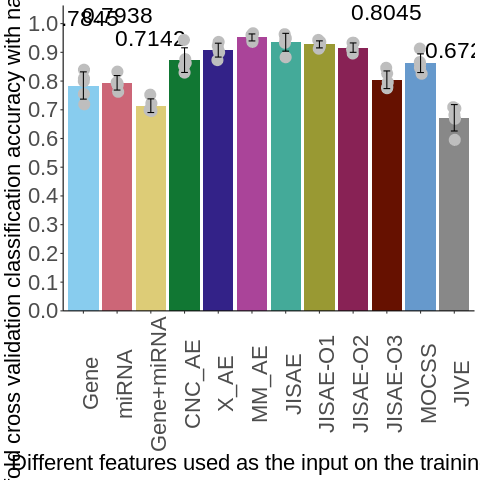

In [433]:
%%R -i nb_classification_training_ -i nb_classification_training_sum

p2 <- ggplot(nb_classification_training_, aes(x = index, y = accuracy, fill = index)) +
    geom_bar(position = 'dodge', stat = 'summary', fun=mean) +
    geom_text(aes(label = after_stat(round(y, 4))), stat = "summary", fun = "mean", vjust = -4 , size=8) +
    
    geom_point(aes(x = index), position = 
           position_jitterdodge(jitter.width = 0.5, jitter.height=0, 
                                dodge.width=1), size=5, color='gray') +
    
    geom_errorbar(aes(ymin = accuracy-std, ymax = accuracy+std), data = nb_classification_training_sum, 
    width = 0.2, position = position_dodge(0.8)) +
    scale_y_continuous(breaks = seq(0, 1, 0.1), expand = expansion(mult = c(0, 0.1))) +
      labs(x='Different features used as the input on the training set',
           y='5-fold cross validation classification accuracy with naive bayes classifier',
           fill='Features') +
      scale_fill_manual('Features', values = c("#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888")) +
      theme_classic() +
      theme(legend.position = "None",
            legend.title = element_text(size = 22),
            legend.text = element_text(size = 18),
            axis.text.x = element_text(angle = 90, size = 22),
            axis.text.y = element_text(size = 22),
            axis.title = element_text(size = 22))



ggsave(filename=file.path('/home/wangc90/Data_integration/AE_results_folder/nb_5cv_acc_training_tcga.svg'),
       width=15, height=15, plot=p2)
p2

In [434]:
%%R -o nb_classification_testing_ -o nb_classification_testing_sum
nb_classification_testing = read.csv('/home/wangc90/Data_integration/TCGA_model_outputs/model_retraining_outputs/Results/nb_classification_results_testing.csv', header=T, sep=',')

nb_classification_testing_ <- nb_classification_testing %>%
pivot_longer(cols = c(fold1, fold2, fold3, fold4, fold5),
               names_to = "cv_num",
               values_to = "accuracy")

nb_classification_testing_$index = factor(nb_classification_testing_$index, levels = c(c('Gene', 'miRNA', 'Gene+miRNA',
                                                                                        'CNC_AE', 'X_AE',
                                                                                         'MM_AE', 'JISAE',
                                                                                         'JISAE-O1', 'JISAE-O2',
                                                                                         'JISAE-O3', 'MOCSS',
                                                                                         'JIVE')))

## for plot the summary statistics
nb_classification_testing_sum <- nb_classification_testing_ %>%
    group_by(index) %>%
    summarise(
    std = sd(accuracy),
    accuracy = mean(accuracy))


In [435]:
nb_classification_testing_sum

,index,std,accuracy
1,Gene,0.033868,0.577946
2,miRNA,0.064430,0.572685
3,Gene+miRNA,0.041169,0.577946
4,CNC_AE,0.011268,0.956973
5,X_AE,0.054199,0.876505
6,MM_AE,0.040062,0.881658
7,JISAE,0.027757,0.887135
8,JISAE-O1,0.031545,0.919351
9,JISAE-O2,0.033622,0.889730
10,JISAE-O3,0.036846,0.911495


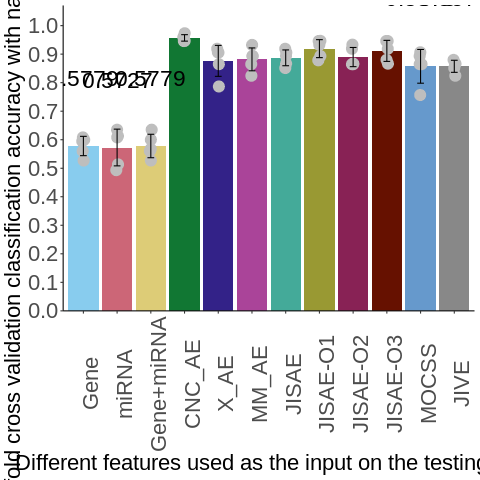

In [437]:
%%R -i nb_classification_testing_ -i nb_classification_testing_sum

p3 <- ggplot(nb_classification_testing_, aes(x = index, y = accuracy, fill = index)) +
    geom_bar(position = 'dodge', stat = 'summary', fun=mean) +
    geom_text(aes(label = after_stat(round(y, 4))), stat = "summary", fun = "mean", vjust = -4, size=8) +
    geom_point(aes(x = index), position = 
           position_jitterdodge(jitter.width = 0.5, jitter.height=0, 
                                dodge.width=1), size=5, color='gray') +

    geom_errorbar(aes(ymin = accuracy-std, ymax = accuracy+std), data = nb_classification_testing_sum, 
    width = 0.2, position = position_dodge(0.8)) +

    scale_y_continuous(breaks = seq(0, 1, 0.1), expand = expansion(mult = c(0, 0.1))) +
      labs(x='Different features used as the input on the testing set',
           y='5-fold cross validation classification accuracy with naive bayes classifier',
           fill='Features') +
      scale_fill_manual('Features', values = c("#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888")) +
      theme_classic() +
      theme(legend.position = "None",
            legend.title = element_text(size = 22),
            legend.text = element_text(size = 18),
            axis.text.x = element_text(angle = 90, size = 22),
            axis.text.y = element_text(size = 22),
            axis.title = element_text(size = 22))
ggsave(filename=file.path('/home/wangc90/Data_integration/AE_results_folder/nb_5cv_acc_testing_tcga.svg'),
       width=15, height=15, plot=p3)

p3
